In [1]:

%load_ext autoreload
%autoreload 2

We imported the dataset into a dataframe

In [2]:

# Import the dataset
#df_imdb_movies = import_dataset('imdb-movies-dataset.zip')
#saving_df_to_pickle(df_imdb_movies, 'imdb-movies-dataset')

In [3]:
from Classes.importing_dataset import loading_df_from_pickle
#Importing the imdb movies dataset from pickle
df_imdb_movies = loading_df_from_pickle('imdb-movies-dataset')

Make a graph, where actors are the nodes and there an edge between two nodes if the two actors are in the same movie

In [4]:
from Classes.graph_variables import *
from Classes.actor_graph import *


actors_graph = ActorGraph()

In [8]:
## In the df_imdb_movies the actors are in a list on the crew culomns the following way: actor1, character1, actor2, character2,...
## So we have to delete the characters with the making_actor_lists
actors_graph.make_graph(making_actor_lists(df_imdb_movies["crew"]))

In [10]:
print("Number of edges: " + str(actors_graph.graph.number_of_edges()))
print("Number of nodes: " + str(actors_graph.graph.number_of_nodes()))

Number of edges: 318967
Number of nodes: 42655


Next graph: movies are nodes, there are edges between them if the same actor is in both of them.

In [20]:
df_imdb_movies
df_imdb_english_movies = df_imdb_movies[df_imdb_movies["orig_lang"] == "English"]

In [21]:
df_imdb_movies

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
...,...,...,...,...,...,...,...,...,...,...,...,...
10173,20th Century Women,12/28/2016,73.0,Drama,"In 1979 Santa Barbara, California, Dorothea Fi...","Annette Bening, Dorothea Fields, Lucas Jade Zu...",20th Century Women,Released,English,7000000.0,9.353729e+06,US
10174,Delta Force 2: The Colombian Connection,08/24/1990,54.0,Action,When DEA agents are taken captive by a ruthles...,"Chuck Norris, Col. Scott McCoy, Billy Drago, R...",Delta Force 2: The Colombian Connection,Released,English,9145817.8,6.698361e+06,US
10175,The Russia House,12/21/1990,61.0,"Drama, Thriller, Romance","Barley Scott Blair, a Lisbon-based editor of R...","Sean Connery, Bartholomew 'Barley' Scott Blair...",The Russia House,Released,English,21800000.0,2.299799e+07,US
10176,Darkman II: The Return of Durant,07/11/1995,55.0,"Action, Adventure, Science Fiction, Thriller, ...",Darkman and Durant return and they hate each o...,"Larry Drake, Robert G. Durant, Arnold Vosloo, ...",Darkman II: The Return of Durant,Released,English,116000000.0,4.756613e+08,US


In [22]:
from Classes.movie_graph import MovieGraph
movies_graph = MovieGraph()

movies_crew_lists_dictionary = {}
for i in range(len(df_imdb_movies["names"])):
    if isinstance(df_imdb_movies["crew"][i], str) and df_imdb_movies["orig_lang"][i] == ' English':
        actors_list = df_imdb_movies["crew"][i].split(",")[::2]
        movies_crew_lists_dictionary[df_imdb_movies["names"][i]] = actors_list





In [23]:
len(movies_crew_lists_dictionary)

6997

In [24]:
movies_graph.make_graph(movies_crew_lists_dictionary)

In [25]:
movies_graph.graph.number_of_edges()

166596

In [26]:
movies_graph.graph.number_of_nodes()

6997

In [27]:
from IPython.core.display import Markdown
import networkx as nx

#For some analysis we use the GGC, because it shows the main connected part of the network where most nodes are linked,
# making the results more accurate and easier to interpret.

largest_cc_nodes = max(nx.connected_components(movies_graph.graph), key=len)
giant_connected_component = movies_graph.graph.subgraph(largest_cc_nodes).copy()

In [28]:
giant_connected_component.number_of_nodes()

6736

In [29]:
# 3 column of the table: src, trg, weight
# We prepared a table because the disparity_filter function requires the input data to be in a tabular format.
# This table was then saved as a CSV file and loaded using the read function from the backboning library.
# we use tab as separator as it is required in the read me

import pandas as pd

#Create an empty list to store edge information for creating a DataFrame
edge_data = []
with open("weighted_network1.txt", "w", encoding="utf-8") as f:
    f.write("src\ttrg\tweight\n")
    for u, v , data in movies_graph.graph.edges(data=True):
        weight = data.get('weight', 1.0)
        f.write(f"{u}\t{v}\t{data['weight']}\n")
        edge_data.append({"src": u, "trg": v, "nij": weight})

# Convert the list of edge dictionaries into a pandas DataFrame.
df = pd.DataFrame(edge_data)
# Save the DataFrame as a tab-separated CSV file
# We use the \t as the separator is important, because the backboning library’s README specifies that the input must be tab-delimited.
df.to_csv("movies_graph_english_bn.csv", sep="\t", index=False)


In [30]:
import backboning as bn
# The "read" function loads the data in the correct format expected by the library.
df_edges, _, _ = bn.read("Datasets/movies_graph_english_bn.csv", "nij")
backbone_w1 = bn.disparity_filter(df_edges)

Calculating DF score...


In [31]:

import networkx as nx
from backboning import disparity_filter

# Ensure the weight column is named correctly ('nij'), as required by the disparity_filter function.
df_edges = df_edges.rename(columns={'weight': 'nij'})

backbone_df = disparity_filter(df_edges)

# Filter the resulting backbone by significance score
# Only keep edges with a score above 0.62 to retain the strongest connections
# The 0.62 threshold was chosen to retain only the most significant edges in the disparity filter,
# removing weak/noisy links while preserving the main structure of the network for analysis.
backbone_df = backbone_df[backbone_df['score'] > 0.62]


Calculating DF score...


In [32]:
# Convert the filtered backbone DataFrame back into a NetworkX graph.
backbone_w1 = nx.from_pandas_edgelist(backbone_df, source="src", target="trg", edge_attr="score")

# Compare the size of the original network to the extracted backbone
# This represents, how much the network was reduced after filtering
print("Number of edges in the original graph:", movies_graph.graph.number_of_edges())
print("Number of edges in the backbone:", backbone_w1.number_of_edges())

Number of edges in the original graph: 166596
Number of edges in the backbone: 94067


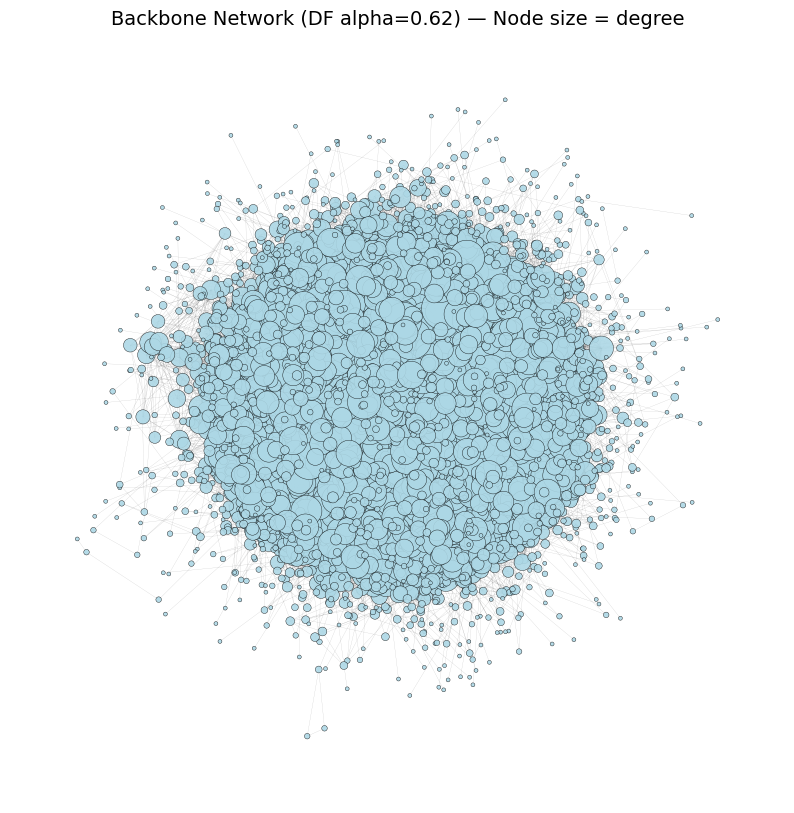

**Figure 1.6:** *Backbone network visualization*

In [33]:
# Assignment-compliant backbone plot (no color, size = total degree)
bb_nodes = max(nx.connected_components(backbone_w1), key=len)
BB = backbone_w1.subgraph(bb_nodes).copy()

node_size_deg_bb = [BB.degree(n) * 8 for n in BB.nodes()]
pos_bb = nx.forceatlas2_layout(BB, gravity=10)

plt.figure(figsize=(10,10))
nx.draw_networkx_edges(BB, pos_bb, width=0.15, alpha=0.25, edge_color="black")
nx.draw_networkx_nodes(
    BB, pos_bb,
    node_size=node_size_deg_bb,
    node_color="lightblue",
    edgecolors="black",
    linewidths=0.3,
    alpha=0.9
)
plt.title("Backbone Network (DF alpha=0.62) — Node size = degree", fontsize=14)
plt.axis('off')
plt.show()
display(Markdown("**Figure 1.6:** *Backbone network visualization*"))


Directors

In [34]:
from Classes.importing_dataset import import_dataset

df_movies_with_director =  import_dataset('Datasets/IMDb movies.csv')#

/Users/dhanna/Documents/Egyetem/DTU/2_Semester/Social_Graphs_And_Interactions/final_project/importing_dataset.py:4: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [11]:
len(df_movies_with_director)

85855

In [12]:
df_movies_with_director

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,NaN,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN


In [39]:
df_movies_with_director["title"]

0                            Miss Jerry
1           The Story of the Kelly Gang
2                        Den sorte drøm
3                             Cleopatra
4                             L'Inferno
                      ...              
85850                           Le lion
85851    De Beentjes van Sint-Hildegard
85852         Padmavyuhathile Abhimanyu
85853                 Sokagin Çocuklari
85854        La vida sense la Sara Amat
Name: title, Length: 85855, dtype: object

In [74]:
duck = 0

for i in range(len(df_movies_with_director)):
    if isinstance(df_movies_with_director["year"][i], int) and df_movies_with_director["year"][i] >= 1990:
        duck += 1

In [73]:
type(df_movies_with_director["year"][1])

int

In [75]:
duck

36511

In [44]:
indices = df_movies_with_director[df_movies_with_director['title'].str.contains('Cleopatra', na=False)].index.tolist()
print(indices)

[3, 91, 1780, 5193, 7548, 7747, 10014, 10696, 11413, 11681, 11771, 13380, 15952, 18378, 21139, 32975, 33028, 38264, 42891, 84570]


In [52]:
type(df_movies_with_director["year"][0])

int

In [56]:
from datetime import datetime
movies_directors_dict = {}


for i in range(len(df_imdb_movies)):
    if df_movies_with_director['title'].isin([df_imdb_movies["names"][i]]).any():
        indices = df_movies_with_director[df_movies_with_director['title'].str.contains(df_imdb_movies["names"][i], na=False)].index.tolist()
        date_object = datetime.strptime(df_imdb_movies["date_x"][i].strip(), "%m/%d/%Y")
        year = date_object.year
        for index in indices:
            if df_movies_with_director["year"][index] == int(year):
                movies_directors_dict[df_imdb_movies["names"][i]] = df_movies_with_director["director"][index]


/var/folders/tm/dl42h4sx33s387vwc738kw480000gn/T/ipykernel_4655/466168036.py:7: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  indices = df_movies_with_director[df_movies_with_director['title'].str.contains(df_imdb_movies["names"][i], na=False)].index.tolist()


In [58]:
len(movies_directors_dict)

1201